## Internship Project 

##### MoodAI is a smart journaling tool that uses AI to analyze your daily emotions. By writing simple journal entries, users can track their mood patterns over time, visualize emotional trends, and receive supportive reflections. This project combines natural language processing (NLP) with data visualization to promote mental wellness in a simple and interactive way.

In [71]:
# Install requirements

!pip install -q textblob matplotlib seaborn
!pip install -q textblob matplotlib seaborn wordcloud

In [72]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import pandas as pd
import random
from wordcloud import WordCloud

# Storage
journal_entries = []

# Motivational quotes
quotes = {
    "Happy": [
        "Keep shining, the world needs your light!",
        "Stay joyful — joy is contagious.",
        "Happiness looks great on you!"
    ],
    "Sad": [
        "Storms make trees take deeper roots.",
        "This too shall pass. You're stronger than you think.",
        "Tough times never last, but tough people do."
    ],
    "Neutral": [
        "Not every day needs to be extraordinary.",
        "Even quiet days bring growth.",
        "Stay steady, stay mindful."
    ]
}

In [73]:
def analyze_entry(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.3:
        mood = 'Happy'
    elif polarity < -0.3:
        mood = 'Sad'
    else:
        mood = 'Neutral'
    return polarity, mood

def ai_reflection(mood):
    reflections = {
        "Happy": [
            "That’s wonderful! Keep riding that wave 🌈",
            "So glad to see you in high spirits!",
            "Let that happiness fuel your day!"
        ],
        "Sad": [
            "It’s okay to feel down. I’m here for you 💙",
            "Gentle reminder: dark clouds pass.",
            "You're doing your best. That’s enough."
        ],
        "Neutral": [
            "Thanks for being present today.",
            "Every entry matters — even the quiet ones.",
            "Sometimes being neutral means balance."
        ]
    }
    return random.choice(reflections[mood])

In [74]:
def add_entry(entry_text):
    timestamp = datetime.now()
    polarity, mood = analyze_entry(entry_text)
    journal_entries.append({
        "Timestamp": timestamp,
        "Entry": entry_text,
        "Polarity": polarity,
        "Mood": mood
    })
    return mood, polarity

In [75]:
def plot_mood_trend():
    if not journal_entries:
        print("No data yet.")
        return
    df = pd.DataFrame(journal_entries)
    df['Date'] = df['Timestamp'].dt.date
    mood_counts = df.groupby(['Date', 'Mood']).size().unstack().fillna(0)
    
    mood_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
    plt.title("📈 Mood Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Mood Count")
    plt.tight_layout()
    plt.show()

def plot_weekly_summary():
    if not journal_entries:
        print("No data yet.")
        return
    df = pd.DataFrame(journal_entries)
    last_week = datetime.now() - timedelta(days=7)
    df_week = df[df['Timestamp'] > last_week]
    mood_counts = df_week['Mood'].value_counts()

    mood_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), startangle=90, colors=['#90ee90','#add8e6','#ffcccb'])
    plt.title("🗓️ Weekly Mood Summary")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

def generate_wordcloud():
    all_text = " ".join(entry["Entry"] for entry in journal_entries)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("📝 Frequently Used Words")
    plt.show()

📝 How are you feeling today?

 I'm just reflecting on the week and feeling okay.



🔍 Mood Detected: Happy (Score: 0.50)
💬 AI Reflection: So glad to see you in high spirits!
💡 Quote of the Day: Keep shining, the world needs your light!


C:\Users\farhe\AppData\Local\Temp\ipykernel_7200\2696341614.py:13: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\farhe\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


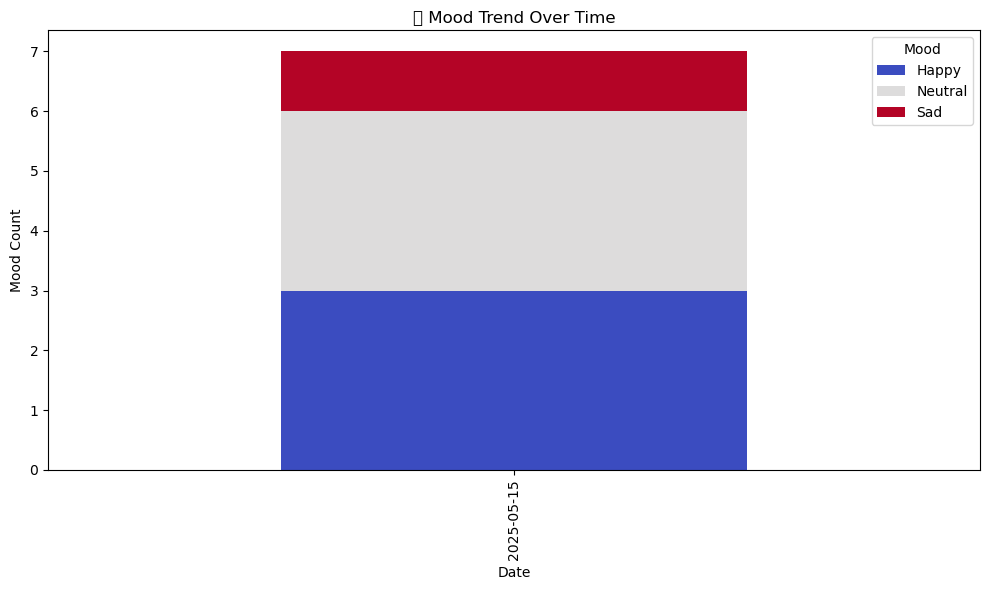

C:\Users\farhe\AppData\Local\Temp\ipykernel_7200\2696341614.py:28: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from current font.
  plt.tight_layout()
C:\Users\farhe\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


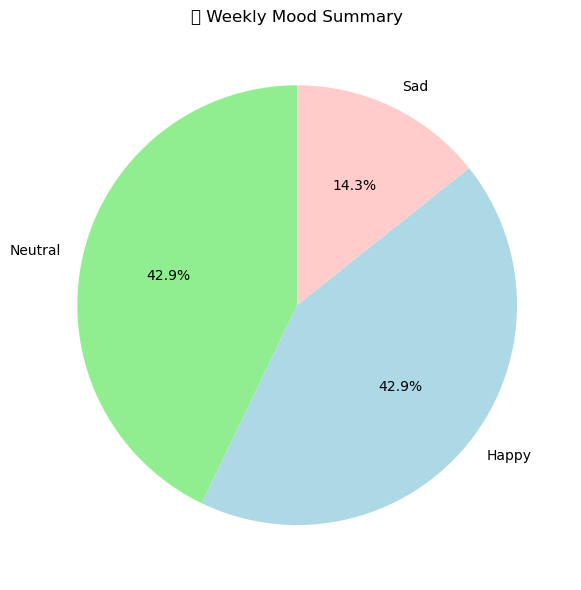

C:\Users\farhe\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128221 (\N{MEMO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


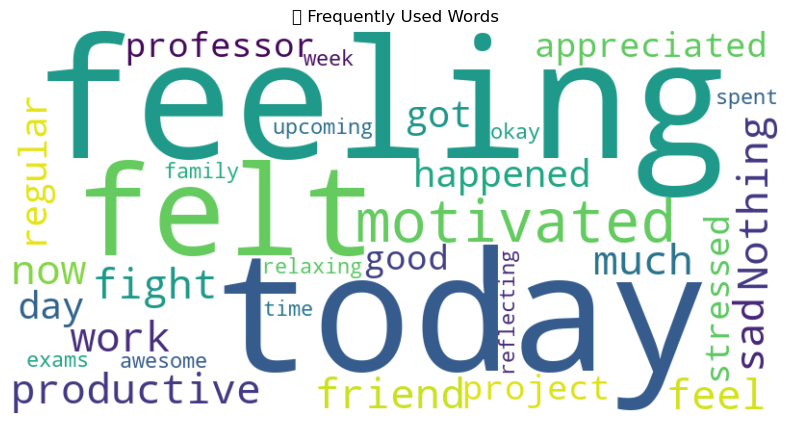

In [93]:
entry = input("📝 How are you feeling today?\n\n")
if entry.strip():
    mood, polarity = add_entry(entry)
    print(f"\n🔍 Mood Detected: {mood} (Score: {polarity:.2f})")
    print("💬 AI Reflection:", ai_reflection(mood))
    print("💡 Quote of the Day:", random.choice(quotes[mood]))

    # Show visuals
    plot_mood_trend()
    plot_weekly_summary()
    generate_wordcloud()
else:
    print("Please write something!")